# Technical analysis MHI version 2_3

In [49]:
import pandas as pd
import numpy as np
import datetime as dt
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import talib as TA
from mpl_finance import candlestick2_ohlc
pd.options.display.max_rows = None
pd.options.display.max_columns = None
%matplotlib inline

In [50]:
pd.options.mode.chained_assignment = None

In [51]:
from mpl_finance import candlestick2_ohlc

## Data importing and data processing

In [52]:
df=pd.read_csv("E:/mhi_2019dec.csv")

In [53]:
df.head()

,Unnamed: 0,Date,High,Low,Open,Close,Volume
0,0,2019-06-03 09:10:00,26765.0,26753.0,26764.0,26757.0,NaN
1,1,2019-06-03 09:15:00,26777.0,26726.0,26764.0,26748.0,NaN
2,2,2019-06-03 09:20:00,26767.0,26728.0,26749.0,26754.0,NaN
3,3,2019-06-03 09:25:00,26808.0,26754.0,26754.0,26784.0,NaN
4,4,2019-06-03 09:30:00,26794.0,26701.0,26783.0,26704.0,NaN


In [54]:
df=df.drop(["Unnamed: 0"],axis=1)
df["ID"]=range(len(df))
df["Date"]=pd.to_datetime(df["Date"],format="%Y/%m/%d %H:%M:%S")
df.index=df["Date"]
df["Date1"]=df["Date"].dt.date
df["Date1"]=pd.to_datetime(df["Date1"],format="%Y-%m-%d")
df["Year"]=df["Date"].dt.year
df["Week"]=df["Date"].dt.week
df["Month"]=df["Date"].dt.month
df["hour"]=df["Date"].dt.hour
df["Gap"]=df["Open"]-df["High"].shift()
df["Volatility"]=df["High"]-df["Low"]
df["Return"]=df["Close"]-df["Open"].shift()
df["EMA9"]=TA.EMA(df["Close"],9)
df["EMA19"]=TA.EMA(df["Close"],19)
df["EMA50"]=TA.EMA(df["Close"],50)
df["ADX"]=TA.ADX(df["High"],df["Low"],df["Close"])
df["DMI+"]=TA.PLUS_DM(df["High"],df["Low"])
df["DMI-"]=TA.MINUS_DM(df["High"],df["Low"])
df["RSI9"]=TA.RSI(df["Close"],9)
df["macd"],df["macdsignal"],df["macdhist"]=TA.MACD(df["Close"],fastperiod=5, slowperiod=34, signalperiod=5)

In [56]:
df.tail()

,Date,High,Low,Open,Close,Volume,ID,Date1,Year,Week,Month,hour,Gap,Volatility,Return,EMA9,EMA19,EMA50,ADX,DMI+,DMI-,RSI9,macd,macdsignal,macdhist
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-30 11:35:00,2019-12-30 11:35:00,28384.0,28373.0,28384.0,28374.0,104.0,27235,2019-12-30,2019,1,12,11,-12.0,11.0,-16.0,28365.702114,28341.713147,28298.003483,42.915232,82.243324,27.409790,68.011145,59.084135,60.229166,-1.145031
2019-12-30 11:40:00,2019-12-30 11:40:00,28377.0,28370.0,28377.0,28371.0,70.0,27236,2019-12-30,2019,1,12,11,-7.0,7.0,-13.0,28366.761691,28344.641833,28300.866091,43.115083,76.368801,28.451948,65.460500,54.808993,58.422441,-3.613448
2019-12-30 11:45:00,2019-12-30 11:45:00,28374.0,28361.0,28372.0,28361.0,191.0,27237,2019-12-30,2019,1,12,11,-5.0,13.0,-16.0,28365.609353,28346.277649,28303.224284,42.419725,70.913887,35.419666,57.389398,48.315876,55.053586,-6.737710
2019-12-30 11:50:00,2019-12-30 11:50:00,28367.0,28362.0,28363.0,28364.0,53.0,27238,2019-12-30,2019,1,12,11,-11.0,5.0,-8.0,28365.287482,28348.049884,28305.607645,41.774036,65.848609,32.889690,59.091708,44.142757,51.416643,-7.273886
2019-12-30 11:55:00,2019-12-30 11:55:00,28374.0,28360.0,28363.0,28372.0,56.0,27239,2019-12-30,2019,1,12,11,-4.0,14.0,9.0,28366.629986,28350.444896,28308.211267,41.512004,68.145137,30.540426,63.469885,42.888363,48.573883,-5.685520


In [57]:
df.shape

(27240, 25)

In [58]:
df_daily=df.groupby(["Date1"]).agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last'})
df_daily["Date"]=df_daily.index
df_daily.head()

,Open,High,Low,Close,Date
Date1,,,,,
2019-06-03,26764.0,26878.0,26578.0,26818.0,2019-06-03
2019-06-04,26817.0,26886.0,26505.0,26847.0,2019-06-04
2019-06-05,26847.0,27004.0,26663.0,26711.0,2019-06-05
2019-06-06,26709.0,26879.0,26676.0,26808.0,2019-06-06
2019-06-07,26805.0,26820.0,26791.0,26808.0,2019-06-07


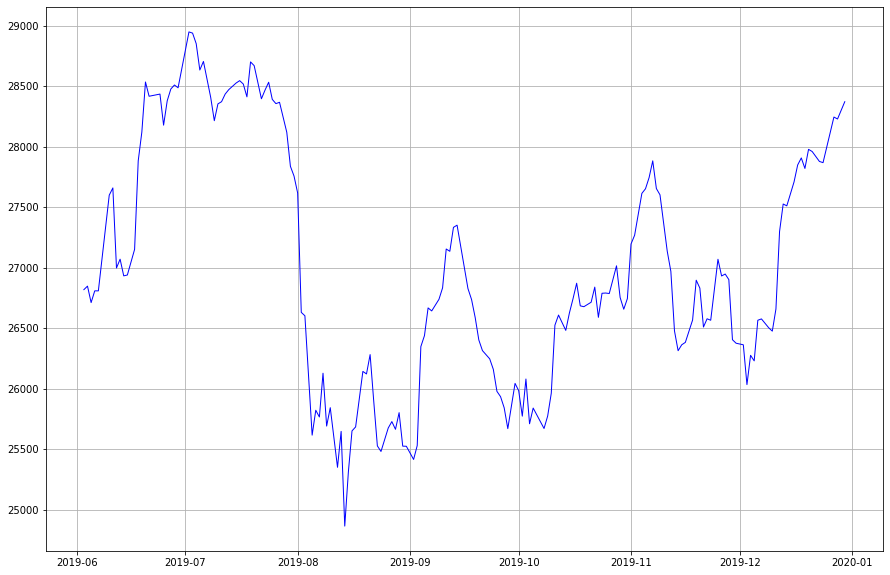

In [17]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(df_daily["Date"],df_daily["Close"],color="blue",label="Close",linewidth=1)
ax.grid(True)
plt.show()

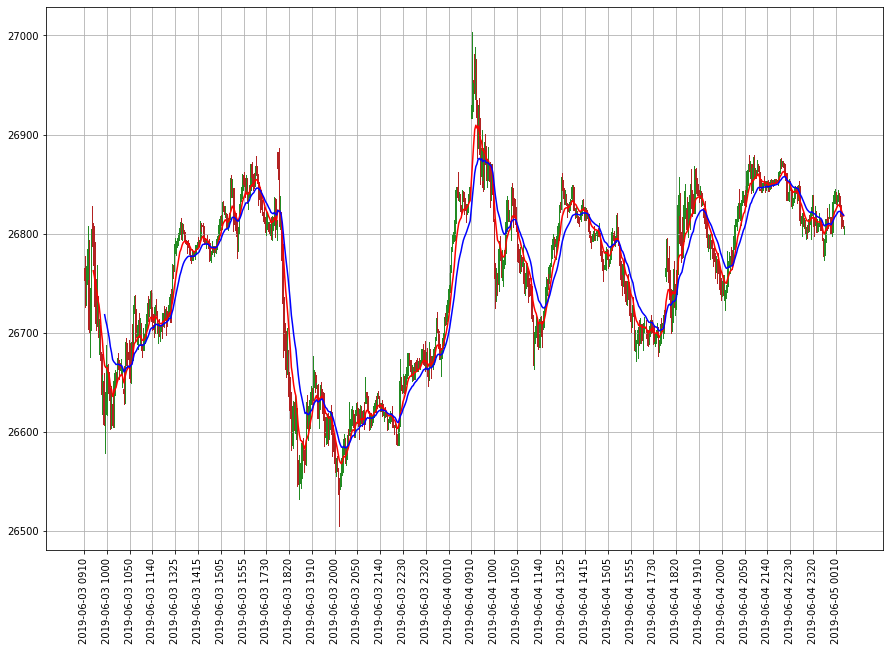

In [69]:
data1=df.loc["2019-06-03":"2019-06-06"].copy()
data1["ID"]=range(len(data1))
f1, ax4 = plt.subplots(figsize = (15,10))

ax4.set_xticks(range(0, len(data1.index),20))
ax4.set_xticklabels(data1.index[::10].strftime("%Y-%m-%d %H%M"))

candlestick2_ohlc(ax4, opens=data1["Open"], highs=data1["High"], lows=data1["Low"], closes=data1["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
ax4.plot(data1["ID"],data1["EMA9"],color="red")
ax4.plot(data1["ID"],data1["EMA19"],color="blue")
ax4.grid(True)
plt.xticks(rotation=90)
plt.show()

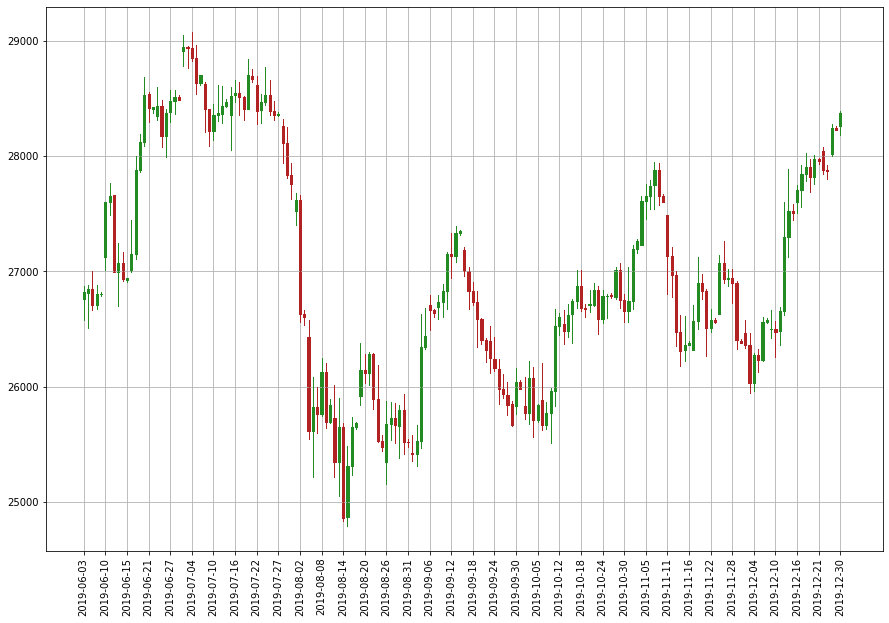

In [70]:
data1=df_daily.copy()
f1, ax4 = plt.subplots(figsize = (15,10))

ax4.set_xticks(range(0, len(data1.index),5))
ax4.set_xticklabels(data1.index[::5].strftime("%Y-%m-%d"))

candlestick2_ohlc(ax4, opens=data1["Open"], highs=data1["High"], lows=data1["Low"], closes=data1["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
ax4.grid(True)
plt.xticks(rotation=90)
plt.show()

In [20]:
df.tail()

,Date,High,Low,Open,Close,Volume,ID,Date1,Year,Week,Month,hour,Gap,Volatility,Return,EMA9,EMA19,EMA50,ADX,DMI+,DMI-,RSI9,macd,macdsignal,macdhist
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-30 11:35:00,2019-12-30 11:35:00,28384.0,28373.0,28384.0,28374.0,104.0,27235,2019-12-30,2019,1,12,11,-12.0,11.0,-16.0,28365.702114,28341.713147,28298.003483,42.915232,82.243324,27.409790,68.011145,59.084135,60.229166,-1.145031
2019-12-30 11:40:00,2019-12-30 11:40:00,28377.0,28370.0,28377.0,28371.0,70.0,27236,2019-12-30,2019,1,12,11,-7.0,7.0,-13.0,28366.761691,28344.641833,28300.866091,43.115083,76.368801,28.451948,65.460500,54.808993,58.422441,-3.613448
2019-12-30 11:45:00,2019-12-30 11:45:00,28374.0,28361.0,28372.0,28361.0,191.0,27237,2019-12-30,2019,1,12,11,-5.0,13.0,-16.0,28365.609353,28346.277649,28303.224284,42.419725,70.913887,35.419666,57.389398,48.315876,55.053586,-6.737710
2019-12-30 11:50:00,2019-12-30 11:50:00,28367.0,28362.0,28363.0,28364.0,53.0,27238,2019-12-30,2019,1,12,11,-11.0,5.0,-8.0,28365.287482,28348.049884,28305.607645,41.774036,65.848609,32.889690,59.091708,44.142757,51.416643,-7.273886
2019-12-30 11:55:00,2019-12-30 11:55:00,28374.0,28360.0,28363.0,28372.0,56.0,27239,2019-12-30,2019,1,12,11,-4.0,14.0,9.0,28366.629986,28350.444896,28308.211267,41.512004,68.145137,30.540426,63.469885,42.888363,48.573883,-5.685520


## To check the performance of the EMA crossover(UP)

In [74]:
def cross_over_up(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])>0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)
def cross_over_down(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])<0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)

In [75]:
EMA_crossoverup=cross_over_up(df,"EMA9","EMA19")

In [76]:
EMA_crossoverup.sum()

655

In [77]:
df["EMA_crossoverup"]=EMA_crossoverup

### Number of crossoverup event per date

In [78]:
df.groupby("Date1")["EMA_crossoverup"].sum()

Date1
2019-06-03    2
2019-06-04    4
2019-06-05    3
2019-06-06    3
2019-06-07    0
2019-06-10    6
2019-06-11    4
2019-06-12    4
2019-06-13    3
2019-06-14    6
2019-06-15    0
2019-06-17    4
2019-06-18    6
2019-06-19    4
2019-06-20    4
2019-06-21    5
2019-06-22    1
2019-06-24    6
2019-06-25    5
2019-06-26    6
2019-06-27    3
2019-06-28    3
2019-06-29    1
2019-07-02    4
2019-07-03    5
2019-07-04    4
2019-07-05    4
2019-07-06    0
2019-07-08    2
2019-07-09    6
2019-07-10    4
2019-07-11    6
2019-07-12    3
2019-07-13    1
2019-07-15    6
2019-07-16    5
2019-07-17    3
2019-07-18    3
2019-07-19    6
2019-07-20    2
2019-07-22    3
2019-07-23    8
2019-07-24    4
2019-07-25    4
2019-07-26    7
2019-07-27    2
2019-07-29    3
2019-07-30    4
2019-07-31    2
2019-08-01    4
2019-08-02    3
2019-08-03    2
2019-08-05    2
2019-08-06    4
2019-08-07    3
2019-08-08    4
2019-08-09    5
2019-08-10    1
2019-08-12    3
2019-08-13    3
2019-08-14    2
2019-08-15    4
20

In [79]:
df["MAX"]=np.nan
df["MIN"]=np.nan

Here we will check the maximum possible profit which could be achieved if day trading is performed (i.e. the trade will be ended by the end of that day of entry.)


In [80]:
for i in range(len(df)):
    if df.iloc[i,:]["EMA_crossoverup"]==1:
        date2=df.iloc[i,:]["Date"]
        date3=date2.date()+dt.timedelta(days=1)    
        df2=df[(df["Date"]>date2) & (df["Date"]<pd.Timestamp(date3))]
        max1=df2["Close"].max()
        min1=df2["Close"].min()
        df["MAX"].iloc[i]=max1
        df["MIN"].iloc[i]=min1
        
        
        
    